In [18]:
import numpy as np
from numpy import genfromtxt
import numpy.matlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [11]:
def preprocessing(train_table, test_table):
    #delete the first rows
    train_no_1st_row = np.delete(train_table, 0, 0)
    test_no_1st_row = np.delete(test_table, 0, 0)
    
    #save the first column as labels lists
    train_labels = train_no_1st_row[:,0]
    test_labels = test_no_1st_row[:,0]

    #save the data without labels as a matrix
    train_no_labels = np.delete(train_no_1st_row, 0, axis=1)
    test_no_labels = np.delete(test_no_1st_row, 0, axis=1)
    
    return train_no_labels, test_no_labels, train_labels, test_labels

In [12]:
# read the two files given
train_table = genfromtxt('MNIST_training.csv', delimiter=',')
test_table = genfromtxt('MNIST_test.csv', delimiter=',')

#preprocess the two tables
train_data, test_data, train_labels, test_labels = preprocessing(train_table, test_table)

In [13]:
# row length of test data
row = np.size(test_data, 0)

# column length of test data
column = np.size(test_data, 1)

#list where amounts of accuracy are saved
k_list = []

#max size of k by which accuracy is calculated
max_k = 40

for i in range(1, max_k):
    count = 0
    for j in range(row):
        #calculate the eculian_distances between a test data and train data
        e_dists = np.sum((test_data[j] - train_data)**2, axis=1)
        
        #save the results in a list with labels
        e_dists_with_labels = list(zip(train_labels, e_dists))
        
        #sort the list in descending order according to the size of distances
        e_dists_with_labels.sort(key=lambda val: val[1])
        
        #fetch the smallest dists until k size
        k = i
        smallest_dists = e_dists_with_labels[0:k]
        
        #predict the label of the test data with the max labels 
        output_values = [data[0] for data in smallest_dists]
        prediction = max(set(output_values), key=output_values.count)
        
        #if the prediction is correct
        if test_labels[j] == prediction:
            count += 1
            
    #calculate the accuracy and save the result in k_list
    accuracy = count/row
    print("When k size is {}, ".format(i), "accuracy is", accuracy)
    k_list.append(accuracy)

When k size is 1,  accuracy is 0.84
When k size is 2,  accuracy is 0.84
When k size is 3,  accuracy is 0.86
When k size is 4,  accuracy is 0.88
When k size is 5,  accuracy is 0.86
When k size is 6,  accuracy is 0.86
When k size is 7,  accuracy is 0.9
When k size is 8,  accuracy is 0.9
When k size is 9,  accuracy is 0.9
When k size is 10,  accuracy is 0.88
When k size is 11,  accuracy is 0.84
When k size is 12,  accuracy is 0.84
When k size is 13,  accuracy is 0.82
When k size is 14,  accuracy is 0.82
When k size is 15,  accuracy is 0.82
When k size is 16,  accuracy is 0.82
When k size is 17,  accuracy is 0.82
When k size is 18,  accuracy is 0.82
When k size is 19,  accuracy is 0.82
When k size is 20,  accuracy is 0.84
When k size is 21,  accuracy is 0.82
When k size is 22,  accuracy is 0.84
When k size is 23,  accuracy is 0.82
When k size is 24,  accuracy is 0.8
When k size is 25,  accuracy is 0.8
When k size is 26,  accuracy is 0.8
When k size is 27,  accuracy is 0.8
When k size is 28

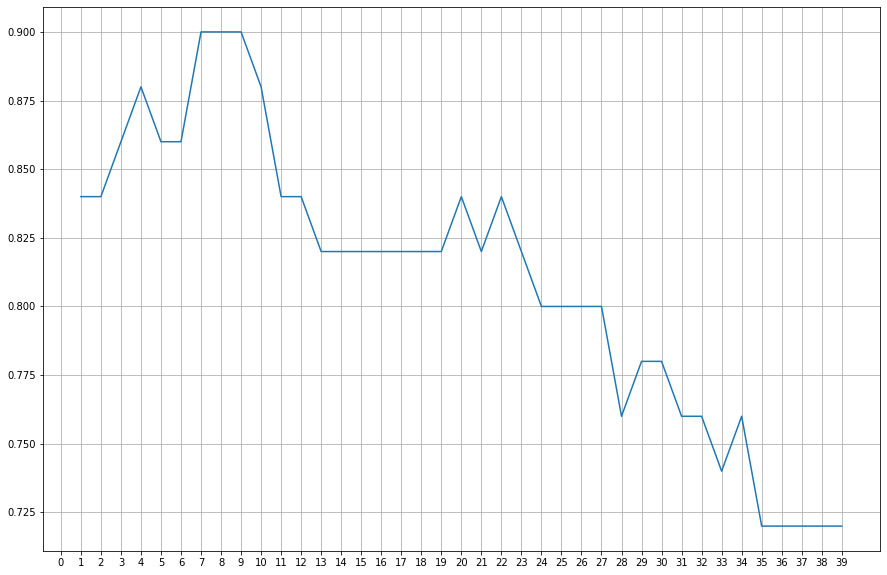

In [14]:
#plot the result in a graph
figure(figsize=(15,10))
plt.plot(np.arange(1, max_k), k_list)
plt.xticks(np.arange(max_k))
plt.grid()
plt.show()

In [16]:
#save the k size and the accuracy in a list
max_accuracy = [[i+1, x] for i, x in enumerate(k_list) if x == max(k_list)]

#print the max accuracy and the size in a list
print("When max accuracy is {}".format(max_accuracy[0][1]), ", k size is ", [x[0] for x in max_accuracy])

When max accuracy is 0.9 , k size is  [7, 8, 9]
